In [1]:
import requests
from PIL import Image
from io import BytesIO

Country: Lebanon
Region: Mount Lebanon Governorate
City: Dahr El Hossein
Suburb: N/A
Neighbourhood: N/A
Street: Road 6
Postcode: 2753


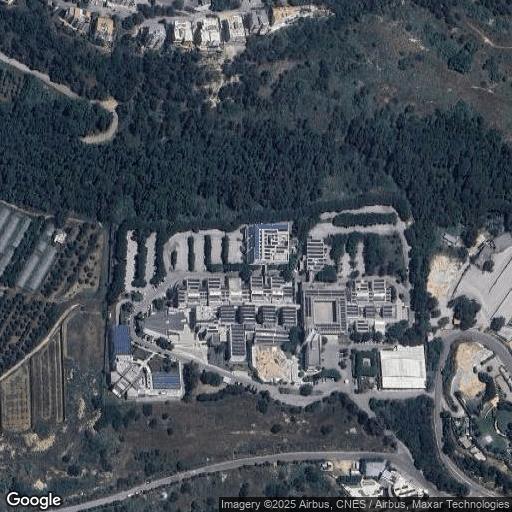

In [19]:
def get_region_from_coordinates(latitude, longitude):
    api_key = "a8**************************" #Replace with your API key
    base_url = "https://api.opencagedata.com/geocode/v1/json"

    params = {
        "q": f"{latitude},{longitude}",
        "key": api_key,
        "language": "en",
        "countrycode": "lb",
    }

    try:
        response = requests.get(base_url, params=params)
        response.raise_for_status()

        data = response.json()
        if data["results"]:
            components = data["results"][0]["components"]
            country = components.get("country", "N/A")
            region = components.get("state", "N/A")
            city = components.get("city", components.get("town", components.get("village", "N/A")))
            suburb = components.get("suburb", "N/A")
            neighbourhood = components.get("neighbourhood", "N/A")
            road = components.get("road", "N/A")
            postcode = components.get("postcode", "N/A")

            formatted_output = (
                f"Country: {country}\n"
                f"Region: {region}\n"
                f"City: {city}\n"
                f"Suburb: {suburb}\n"
                f"Neighbourhood: {neighbourhood}\n"
                f"Street: {road}\n"
                f"Postcode: {postcode}"
            )

            return formatted_output
        else:
            return "No results found for the given coordinates."
    except requests.exceptions.RequestException as e:
        return f"An error occurred: {e}"

def get_image(x, y, zoom=17, resolution=512, api_key=''):
    url = f"https://maps.googleapis.com/maps/api/staticmap?"
    params = {
        "center": f"{x}, {y}",
        "zoom": zoom,
        "size": f"{resolution}x{resolution}",
        "maptype": "satellite",
        "key": api_key
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        return Image.open(BytesIO(response.content))
    else:
        print(f"Error: {response.status_code}")

api_key = 'AIz********************' #Replace with your API key
x1, x2 = 33.8660635, 35.5634445
print(get_region_from_coordinates(33.8660635, 35.5634445))
get_image(x1, x2, api_key=api_key)
